In [1]:
! wget -O preprocessed.tar https://www.dropbox.com/s/urb8kwnd6sigom5/preprocessed.tar?dl=0

--2020-06-01 07:27:23--  https://www.dropbox.com/s/urb8kwnd6sigom5/preprocessed.tar?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.65.1, 2620:100:6021:1::a27d:4101
Connecting to www.dropbox.com (www.dropbox.com)|162.125.65.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/urb8kwnd6sigom5/preprocessed.tar [following]
--2020-06-01 07:27:23--  https://www.dropbox.com/s/raw/urb8kwnd6sigom5/preprocessed.tar
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucba0f07e5f06d5e464bb564d75a.dl.dropboxusercontent.com/cd/0/inline/A4wGfLcal0nEucIW_cWKXmR8HlYqKkYzdCUOX9HN9Y5A1Xp9zVH_Op711xnt4KFJDFPthjix2tyvTTTqeIcq8ouxjQnmE9gr2ZU7HEMVpkmmaQ/file# [following]
--2020-06-01 07:27:24--  https://ucba0f07e5f06d5e464bb564d75a.dl.dropboxusercontent.com/cd/0/inline/A4wGfLcal0nEucIW_cWKXmR8HlYqKkYzdCUOX9HN9Y5A1Xp9zVH_Op711xnt4KFJDFPthjix2tyvTTTqeIcq8ouxjQnmE9gr2ZU7HEMVpkmmaQ/file

In [0]:
! tar xf ./preprocessed.tar

In [0]:
! mv ./preprocessed/ .. 


In [4]:
! ls -l ../preprocessed/*/*.csv

-rwxr-xr-x 1 197609 197121 157576 May  4 10:35 ../preprocessed/n1000__shuffle1_seed123/all.csv
-rwxr-xr-x 1 197609 197121  15825 May  4 10:35 ../preprocessed/n1000__shuffle1_seed123/test.csv
-rwxr-xr-x 1 197609 197121 126003 May  4 10:35 ../preprocessed/n1000__shuffle1_seed123/train.csv
-rwxr-xr-x 1 197609 197121  15828 May  4 10:35 ../preprocessed/n1000__shuffle1_seed123/val.csv


In [5]:
! ls -l ../preprocessed/n1000__shuffle1_seed123/images/covid-chestxray-dataset/ | head
! ls -l ../preprocessed/n1000__shuffle1_seed123/images/rsna/ | head


total 219084
-rwxr-xr-x 1 197609 197121  367441 May  4 10:33 01E392EE-69F9-4E33-BFCE-E5C968654078.jpeg
-rwxr-xr-x 1 197609 197121  312368 May  4 10:33 03BF7561-A9BA-4C3C-B8A0-D3E585F73F3C.jpeg
-rwxr-xr-x 1 197609 197121  309985 May  4 10:33 1312A392-67A3-4EBF-9319-810CF6DA5EF6.jpeg
-rwxr-xr-x 1 197609 197121 2084718 May  4 10:33 16654_1_1.png
-rwxr-xr-x 1 197609 197121  199809 May  4 10:33 16654_2_1.jpg
-rwxr-xr-x 1 197609 197121  235281 May  4 10:33 16654_4_1.jpg
-rwxr-xr-x 1 197609 197121   47798 May  4 10:33 16660_1_1.jpg
-rwxr-xr-x 1 197609 197121   43617 May  4 10:33 16660_2_1.jpg
-rwxr-xr-x 1 197609 197121   46543 May  4 10:33 16660_3_1.jpg
total 169580
-rwxr-xr-x 1 197609 197121 160974 May  4 10:34 019d950b-dd38-4cf3-a686-527a75728be6.jpg
-rwxr-xr-x 1 197609 197121 181187 May  4 10:34 020f45a7-14f8-4ed6-9639-3969d1a87b8c.jpg
-rwxr-xr-x 1 197609 197121 185453 May  4 10:33 02336c62-4e72-4818-8198-c327096a71e0.jpg
-rwxr-xr-x 1 197609 197121 130023 May  4 10:34 025d196b-cfa4-44a5-9e

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
from skimage.io import imread



In [14]:
df_tr = pd.read_csv("../preprocessed/n1000__shuffle1_seed123/train.csv")

df_tr.head()

,Unnamed: 0,filename,label,sex,age,view,label_str
0,206,../preprocessed//n1000__shuffle1_seed123/image...,1,M,70.0,PA,other_pneumonia
1,18572,../preprocessed//n1000__shuffle1_seed123/image...,1,M,68.0,AP,other_pneumonia
2,61,../preprocessed//n1000__shuffle1_seed123/image...,1,M,40.0,PA,other_pneumonia
3,258,../preprocessed//n1000__shuffle1_seed123/image...,2,M,65.0,AP,COVID-19
4,21326,../preprocessed//n1000__shuffle1_seed123/image...,1,M,33.0,AP,other_pneumonia


In [15]:
df_val = pd.read_csv("../preprocessed/n1000__shuffle1_seed123/val.csv")

df_val.head()

,Unnamed: 0,filename,label,sex,age,view,label_str
0,42,../preprocessed//n1000__shuffle1_seed123/image...,2,F,55.0,PA,COVID-19
1,30037,../preprocessed//n1000__shuffle1_seed123/image...,1,F,40.0,AP,other_pneumonia
2,309,../preprocessed//n1000__shuffle1_seed123/image...,2,F,30.0,PA,COVID-19
3,4985,../preprocessed//n1000__shuffle1_seed123/image...,1,M,28.0,AP,other_pneumonia
4,1722,../preprocessed//n1000__shuffle1_seed123/image...,1,M,26.0,PA,other_pneumonia


In [16]:
df_te = pd.read_csv("../preprocessed/n1000__shuffle1_seed123/test.csv")

df_te.head()

,Unnamed: 0,filename,label,sex,age,view,label_str
0,303,../preprocessed//n1000__shuffle1_seed123/image...,1,M,76.0,PA,other_pneumonia
1,23372,../preprocessed//n1000__shuffle1_seed123/image...,0,M,65.0,PA,normal
2,264,../preprocessed//n1000__shuffle1_seed123/image...,2,M,85.0,AP,COVID-19
3,15578,../preprocessed//n1000__shuffle1_seed123/image...,0,M,6.0,AP,normal
4,13881,../preprocessed//n1000__shuffle1_seed123/image...,1,M,60.0,AP,other_pneumonia


In [20]:
print(df_te.iloc[0])
print(df_te.iloc[0,1])


Unnamed: 0                                                  303
filename      ../preprocessed//n1000__shuffle1_seed123/image...
label                                                         1
sex                                                           M
age                                                          76
view                                                         PA
label_str                                       other_pneumonia
Name: 0, dtype: object
../preprocessed//n1000__shuffle1_seed123/images/covid-chestxray-dataset/wong-0005.jpg


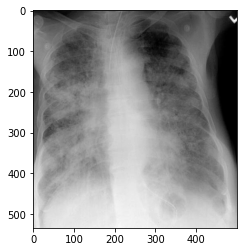

In [22]:
im = imread("../preprocessed//n1000__shuffle1_seed123/images/covid-chestxray-dataset/wong-0005.jpg")

plt.imshow(im, cmap="gray")